In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

data = data.dropna(axis="index" , how="any" , subset=["Price" , "Body Style" , "Fuel Efficiency" , "Engine Volume" , "Manufacture Year", "Powertrain"])

data = data.replace("Gas", "Petrol")

# Exceptional cases (Prices too high)
data = data.drop(index=1693)
data = data.drop(index=2336)
data = data.drop(index=2390)

In [3]:
price = data['Price']

label_encoder = LabelEncoder()

target_encoding = data.groupby('Body Style')['Price'].mean().to_dict()
data['Body Style'] = data['Body Style'].map(target_encoding)

target_encoding_2 = data.groupby('Variant')['Price'].mean().to_dict()
data['Variant'] = data['Variant'].map(target_encoding_2)

data['Gearbox'] = label_encoder.fit_transform(data['Gearbox'])
data['Manufacturer'] = label_encoder.fit_transform(data['Manufacturer'])
data['Powertrain'] = label_encoder.fit_transform(data['Powertrain'])
data['License Status'] = label_encoder.fit_transform(data['License Status'])
data['Location'] = label_encoder.fit_transform(data['Location'])
data['Owner_Type'] = label_encoder.fit_transform(data['Owner_Type'])

variables = data.drop('Price', axis=1)

# Scale variables using quantile transformer
variables = QuantileTransformer().fit_transform(variables)

# Create model object
rf_regressor = RandomForestRegressor(n_estimators=200, max_depth=12, random_state=1)

param_grid = {
    'n_estimators': [180, 200, 220],
    'max_depth': [10, 12, 14]
}

model = GridSearchCV(
    estimator=rf_regressor,
    cv=5,
    scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
    refit='r2',
    param_grid=param_grid,
    n_jobs=-1
)

# Train the model
model.fit(variables, price)

# Evaluate the model
r2 = model.cv_results_['mean_test_r2']
mae = -model.cv_results_['mean_test_neg_mean_absolute_error']
mse = -model.cv_results_['mean_test_neg_mean_squared_error']
print(f'R2 Score: {r2[0]}')
print(f'Mean Absolute Error: {mae[0]}')
print(f'Mean Squared Error: {mse[0]}')

R2 Score: 0.924004856223237
Mean Absolute Error: 33887.55012994456
Mean Squared Error: 5282404826.935263


Mean Squared Error: 3445187118.7757297
Mean Absolute Error: 30475.25096363637
Best R2 Score: 0.9582811569393428


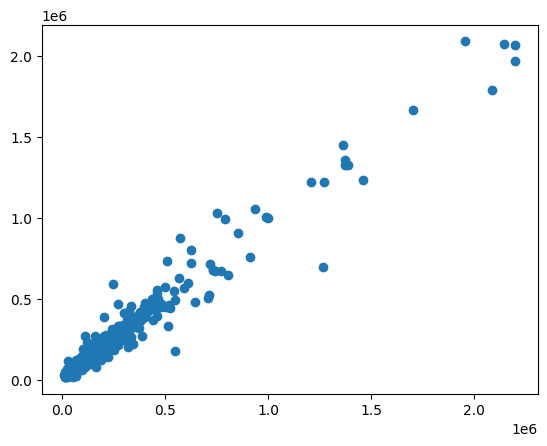

In [4]:
X_train, X_test, y_train, y_test = train_test_split(variables, price, test_size=0.2, random_state=1)

model2 = RandomForestRegressor(n_estimators=100, random_state=1)

# Train the model
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Best R2 Score: {r2}')
plt.scatter(y_test, y_pred)

In [5]:
data2 = pd.read_csv('finaldata.csv')

data2 = data2.replace("Gas", "Diesel")

data2['Body Style'] = data2['Body Style'].map(target_encoding)
data2['Variant'] = data2['Variant'].map(target_encoding_2)

data2['Gearbox'] = label_encoder.fit_transform(data2['Gearbox'])
data2['Manufacturer'] = label_encoder.fit_transform(data2['Manufacturer'])
data2['Powertrain'] = label_encoder.fit_transform(data2['Powertrain'])
data2['License Status'] = label_encoder.fit_transform(data2['License Status'])
data2['Location'] = label_encoder.fit_transform(data2['Location'])
data2['Owner_Type'] = label_encoder.fit_transform(data2['Owner_Type'])

indexes = data2['index']
data2 = data2.drop('index', axis=1)

imputer = SimpleImputer(strategy='median')
data2 = pd.DataFrame(imputer.fit_transform(data2), columns=data2.columns)

data2 = QuantileTransformer().fit_transform(data2)

y_compete = model.predict(data2)
y_compete = pd.DataFrame(y_compete)
y_compete['index'] = indexes
y_compete = y_compete.rename(columns={0: 'Price'})
display(y_compete)


,Price,index
0,81385.414481,1
1,133479.134113,7
2,28400.485707,11
3,267231.132789,17
4,149466.693434,26
...,...,...
1203,346921.025138,4016
1204,25717.543575,4017
1205,83105.594286,4018
1206,173879.433228,4022


In [6]:
display(pd.DataFrame(y_compete))
y_compete.to_csv('compete.csv')

,Price,index
0,81385.414481,1
1,133479.134113,7
2,28400.485707,11
3,267231.132789,17
4,149466.693434,26
...,...,...
1203,346921.025138,4016
1204,25717.543575,4017
1205,83105.594286,4018
1206,173879.433228,4022


In [7]:
'''for key in data.keys():
    if key != 'Price':
        plt.scatter(data[key], price)
        plt.xlabel(key)
        plt.ylabel('Price')
        plt.title(f'Scatter Plot by {key}')
        plt.show()'''

"for key in data.keys():\n    if key != 'Price':\n        plt.scatter(data[key], price)\n        plt.xlabel(key)\n        plt.ylabel('Price')\n        plt.title(f'Scatter Plot by {key}')\n        plt.show()"